<h1><center>Opmatch</center>
</h1>

<center>A lightweight package for optimal case-control matching.</center>

<h3 align="center">
    <a href="#-quick-tour">Quick Tour</a> &bull;
    <a href="#%EF%B8%8F-getting-started">Getting Started</a>
</h3>

## ⚡️ Getting Started
-------------------------

```bash
pip install opmatch
```
or
```bash
conda install -c conda-forge opmatch
```

## 🚀 Quick Tour
----------------------------------

### Generate Data

Text(0, 0.5, 'bmi')

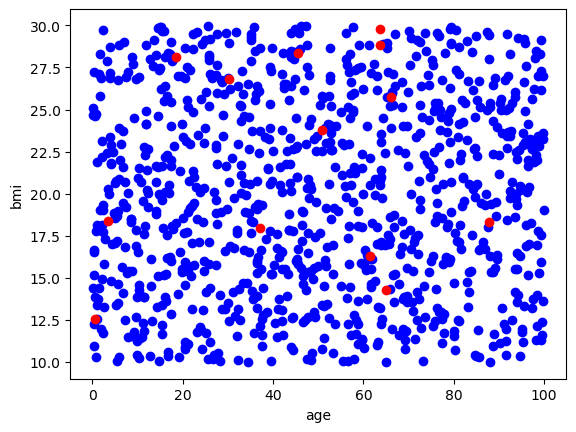

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

num_patients = 1000
age = np.random.uniform(0, 100, num_patients)
bmi = np.random.uniform(10, 30, num_patients)
case = np.random.binomial(1, .01, num_patients)
df = pd.DataFrame({'age':age, 'bmi':bmi, 'case':case})

plt.plot(df.age[df.case==0], df.bmi[df.case==0], 'bo')
plt.plot(df.age[df.case==1], df.bmi[df.case==1], 'ro')
plt.xlabel('age')
plt.ylabel('bmi')

## Perform matching

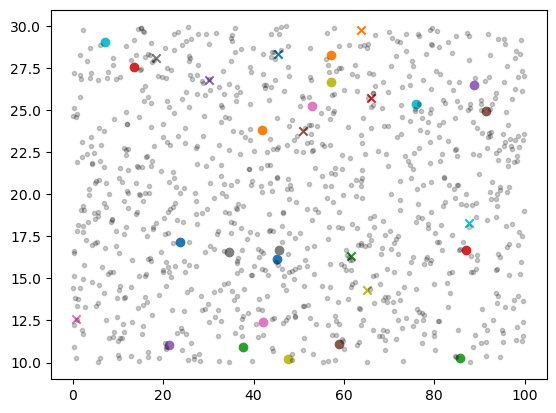

In [2]:
from opmatch import main
case_control_dic = main.match(df=df, matching_ratio=2, metric='Mahalanobis', 
                    matching_type='const', var_cols=['age', 'bmi'])
fig, ax = plt.subplots()
# get colorwheel
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
matched = []
for color, (case, controls) in zip(colors, case_control_dic.items()):
    matched.extend(controls)
    matched.append(case)
    ax.scatter(df.loc[case, 'age'], df.loc[case, 'bmi'], color = color, marker = 'x')
    ax.scatter(df.loc[controls, 'age'], df.loc[controls, 'bmi'], color = color, marker='o')
unmatched = [i for i in df.index if i not in matched]
ax.scatter(df.loc[unmatched, 'age'], df.loc[unmatched, 'bmi'], color = 'k', marker='.', alpha=.2)